In [1]:
from GeneralFunctions_2SC import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

gΔ = 2*mq/fπ
mΔ = 500
λ3 = λ0
λΔ = λ0/4
Λ_cutoff = 3000

In [2]:
def dΩϕ_min_func(ϕ, μ, μe):
    return np.abs(dΩ_NQMdϕ(ϕ, 0,  μ))/fπ**3

def dΩϕΔ_min_func(ϕΔ, μ, μe, μ8, Λ_cutoff):
    ϕ, Δ = ϕΔ
    return np.array([dΩ_2SCdϕ(ϕ, Δ, μ, μe, μ8, gΔ, λ3, Λ_cutoff), dΩ_2SCdΔ(ϕ, Δ, μ, μe, μ8, gΔ, mΔ, λ3, λΔ, Λ_cutoff)])/fπ**3

def dΩϕ_ne_min_func(ϕμe, μ):
    ϕ, μe = ϕμe
    return np.array([num_density_e_NQM(ϕ, μ, μe), dΩ_NQMdϕ(ϕ, μ, μe)])/fπ**3

def gap_and_nen8_func(ϕΔμeμ8, μ, Λ_cutoff):
    ϕ, Δ, μe, μ8 = ϕΔμeμ8
    return np.array([num_density_e_2SC(ϕ, Δ, μ, μe, μ8, gΔ, Λ_cutoff), num_density_8_2SC(ϕ, Δ, μ, μe, μ8, gΔ, Λ_cutoff), dΩ_2SCdϕ(ϕ, Δ, μ, μe, μ8, gΔ, λ3, Λ_cutoff), dΩ_2SCdΔ(ϕ, Δ, μ, μe, μ8, gΔ, mΔ, λ3, λΔ, Λ_cutoff)])/fπ**3
    

In [3]:
def minimize_ϕ(μ, μe0):
    convergence_check = False
    n = 0
    while convergence_check != True:
        x0 = [random.uniform(1, 350)]
        #print(x0)
        result_ϕ = optimize.minimize(dΩϕ_min_func, x0,  args=(μ, μe0), bounds = [(1, 350)])
        #print('Result for run ', n, ' = ', result_ϕ.x, result_ϕ.fun)
        ϕ0 = result_ϕ.x
        #print('Run number: ', n)
        if result_ϕ.fun < 1e-10:
            convergence_check = True
        
        if n > 100:
            print('did not converge for μ = ', μ, ' within 100 tries: returning vacuum value')
            return [300, 0]
        
        n += 1
    return [ϕ0[0], 0]

def minimize_ϕΔ(μ, Λ_cutoff):
    convergence_check = False
    n = 0
    while convergence_check != True:
        x0 = [random.uniform(100, 350), random.uniform(0, 200)]
        result_ϕΔ = optimize.least_squares(dΩϕΔ_min_func, x0,  args=(μ, 0, 0, Λ_cutoff), bounds = ([1, 0], [350, 300]))
        #print('Result for run ', n, ' = ', result_ϕΔ.x, result_ϕΔ.cost)
        ϕ0, Δ0 = result_ϕΔ.x
        #print('Run number: ', n)
        if result_ϕΔ.cost < 1e-10:
            convergence_check = True
        
        if n > 100:
            print('did not converge for μ = ', μ, ' within 100 tries: returning vacuum value')
            return [300, 0]
        
        n += 1
    return [ϕ0, Δ0]

def minimize_ϕμe(μ):
    convergence_check = False
    n = 0
    while convergence_check != True:
        x0 = [random.uniform(10, 300), random.uniform(0, 400)]
        result_ϕμe = optimize.least_squares(dΩϕ_ne_min_func, x0,  args=(μ,), bounds = ([1, 0], [350, 500]))
        #print('Result for run ', n, ' = ', result_ϕμe.x, result_ϕμe.cost)
        ϕ0, μe0 = result_ϕμe.x
        #print('Run number: ', n)
        if result_ϕμe.cost < 1e-10:
            #print('Converged with init: ', x0, ' and values', result_ϕμe.x, ' and func = ', result_ϕμe.cost)
            convergence_check = True
        n += 1
        if n > 100:
            print('did not converge for μ = ', μ, ' within 100 tries')
            return [300, 0, 0, 0]
    if  299 <= ϕ0 <= 301:
        return [ϕ0, 0, 0, 0]
    else:
        return [ϕ0, 0, μe0, 0]

def minimize_ϕΔμeμ8(μ, Λ_cutoff):
    convergence_check = False
    n = 0
    while convergence_check != True:
        x0 = [random.uniform(10, 300), random.uniform(0, 200), random.uniform(100, 400), random.uniform(-100, 100)]
        result_ϕΔμeμ8 = optimize.least_squares(gap_and_nen8_func, x0,  args=(μ, Λ_cutoff), bounds = ([1, 0, 0, -200], [350, 300, 500, 200]))
        #print('Result for run ', n, ' = ', result_ϕΔμeμ8.x, result_ϕΔμeμ8.cost)
        ϕ0, Δ0, μe0, μ80 = result_ϕΔμeμ8.x
        #print('Run number: ', n)
        if result_ϕΔμeμ8.cost < 1e-10:
            #print(gap_and_nen8_func([ϕ0, Δ0, μe0, μ80], μ, Λ_cutoff))
            #print('Converged with init: ', x0, ' and values', result_ϕΔμeμ8.x, ' and func = ', result_ϕΔμeμ8.fun)
            convergence_check = True
        n += 1
        if n > 100:
            print('did not converge for μ = ', μ, ' within 100 tries')
            return [300, 0, 0, 0]
    if Δ0 > 5:
        return [ϕ0, Δ0, μe0, μ80]
    else:
        #return [ϕ0, Δ0, μe0, μ80]
        return [300, 0, 0, 0]
        
def minimize_ϕΔμeμ8_global(μ, Λ_cutoff):
    convergence_check = False
    n = 0
    global_min = [300,0,0,0]
    while convergence_check != True:
        x0 = [random.uniform(10, 300), random.uniform(0, 200), random.uniform(100, 400), random.uniform(-100, 100)]
        result_ϕΔμeμ8 = optimize.least_squares(gap_and_nen8_func, x0,  args=(μ, Λ_cutoff), bounds = ([1, 0, 0, -200], [350, 300, 500, 200]))
        #print('Result for run ', n, ' = ', result_ϕΔμeμ8.x, result_ϕΔμeμ8.cost)
        ϕ0, Δ0, μe0, μ80 = result_ϕΔμeμ8.x
        #print('Run number: ', n)
        if result_ϕΔμeμ8.cost < 1e-10:
            #print('found local minimum with ', result_ϕΔμeμ8.x, grand_potential_2SC(ϕ0, Δ0, μ, μe0, μ80, gΔ, mΔ, λ3, λΔ, Λ_cutoff))
            if grand_potential_2SC(global_min[0], global_min[1], μ, global_min[2], global_min[3], gΔ, mΔ, λ3, λΔ, Λ_cutoff) > grand_potential_2SC(ϕ0, Δ0, μ, μe0, μ80, gΔ, mΔ, λ3, λΔ, Λ_cutoff) and Δ0 >= global_min[1]:
                print('found new potential global minimum with ', result_ϕΔμeμ8.x, grand_potential_2SC(ϕ0, Δ0, μ, μe0, μ80, gΔ, mΔ, λ3, λΔ, Λ_cutoff))
                global_min = [ϕ0, Δ0, μe0, μ80]
            if n > 50:
                #print('Converged with init: ', x0, ' and values', result_ϕΔμeμ8.x, ' and func = ', result_ϕΔμeμ8.fun)
                convergence_check = True
                
        n += 1
        if n > 100:
            print('did not converge for μ = ', μ, ' within 100 tries')
            return [300, 0, 0, 0]
    if Δ0 > 5:
        return [ϕ0, Δ0, μe0, μ80]
    else:
        return [300 , 0, 0, 0]

In [4]:
def minima_combine_common(μ_lin):
    ϕ_NQM = [minimize_ϕ(μi, 0) for μi in tqdm(μ_lin)]
    ϕΔ_2SC = [minimize_ϕΔ(μi, Λ_cutoff) for μi in tqdm(μ_lin)]
    Δ0_list = np.array([i[1] for i in ϕΔ_2SC])
    μ_lin_updated = []
    comb_list = []
    #Need to find the transition point μ_t
    #calculate the potential
    Ω_NQM_2SC_diff_list = np.array([grand_potential_NQM(ϕ_NQM[i][0], μ_lin[i], 0) - grand_potential_2SC(ϕΔ_2SC[i][0], ϕΔ_2SC[i][1], μ_lin[i], 0, 0, gΔ, mΔ, λ3, λΔ, Λ_cutoff) for i in range(len(μ_lin))])
    #print(np.where(Ω_NQM_2SC_diff_list > 0)[0])
    #print(np.where(Δ0_list > 1)[0])
    #if np.min(np.where(Ω_NQM_2SC_diff_list > 0)[0]) < np.min(np.where(Δ0_list > 1)[0])
    μ_t = μ_lin[np.max([np.min(np.where(Ω_NQM_2SC_diff_list > 0)[0]), np.min(np.where(Δ0_list > 1)[0])])]
    #print('μ_t = ', μ_t)
    
    for i in range(len(μ_lin)):
        if μ_lin[i] < μ_t:
            μ_lin_updated.append(μ_lin[i])
            comb_list.append(ϕ_NQM[i])
        elif μ_lin[i] >= μ_t and ϕΔ_2SC[i][1] > 1:
            μ_lin_updated.append(μ_lin[i])
            comb_list.append(ϕΔ_2SC[i])
    return μ_lin_updated, comb_list

def minima_combine_neutral(μ_lin):
    ϕΔμeμ8_NQM = [minimize_ϕμe(μi) for μi in tqdm(μ_lin)]
    #print([grand_potential_NQM(ϕΔμeμ8_NQM[i][0], μ_lin[i], ϕΔμeμ8_NQM[i][2]) for i in range(len(μ_lin))])
    ϕΔμeμ8_2SC = [minimize_ϕΔμeμ8(μi, Λ_cutoff) for μi in tqdm(μ_lin)]
    #print([grand_potential_2SC(ϕΔμeμ8_2SC[i][0], ϕΔμeμ8_2SC[i][1], μ_lin[i], ϕΔμeμ8_2SC[i][2], ϕΔμeμ8_2SC[i][3], gΔ, mΔ, λ3, λΔ, Λ_cutoff) for i in range(len(μ_lin))])
    #ϕΔμeμ8_2SC = [minimize_ϕΔμeμ8_global(μi, Λ_cutoff) for μi in tqdm(μ_lin)]
    Δ0_list = np.array([i[1] for i in ϕΔμeμ8_2SC])
    #print(ϕΔμeμ8_NQM)
    print(ϕΔμeμ8_2SC)

    μ_lin_updated = []
    comb_list = []
    #Need to find the transition point μ_t
    #calculate the potential
    Ω_NQM_2SC_diff_list = np.array([grand_potential_NQM(ϕΔμeμ8_NQM[i][0], μ_lin[i], ϕΔμeμ8_NQM[i][2]) - grand_potential_2SC(ϕΔμeμ8_2SC[i][0], ϕΔμeμ8_2SC[i][1], μ_lin[i], ϕΔμeμ8_2SC[i][2], ϕΔμeμ8_2SC[i][3], gΔ, mΔ, λ3, λΔ, Λ_cutoff) for i in range(len(μ_lin))])
    μ_t = μ_lin[np.max([np.min(np.where(Ω_NQM_2SC_diff_list > 0)[0]), np.min(np.where(Δ0_list > 1)[0])])]
    print('μ_t = ', μ_t)
    
    for i in range(len(μ_lin)):
        if μ_lin[i] < μ_t:
            μ_lin_updated.append(μ_lin[i])
            comb_list.append(ϕΔμeμ8_NQM[i])
        elif μ_lin[i] >= μ_t and ϕΔμeμ8_2SC[i][1] > 1 and ϕΔμeμ8_2SC[i][1] > ϕΔμeμ8_2SC[i-1][1]:
            μ_lin_updated.append(μ_lin[i])
            comb_list.append(ϕΔμeμ8_2SC[i])
    return μ_lin_updated, comb_list

In [5]:
def Δ0_asymototic(gΔ):
    return np.sqrt(mq**2*np.exp((4*np.pi)**2/(4*gΔ**2) -1 - Cπ - mπ**2*dCπ))

def μe_asymptotic(μ, Δ0):
    return 3/11*(1 + (9/2)**(2/3) - (9/2)**(1/3))*μ + (2/243)**(1/3)*Δ0**2/μ

def μ8_asymptotic(μ, Δ0):
    return 9/11*(1 -(375/32)**(1/3) + (125/48)**(1/3))*μ - (125/972)**(1/3)*Δ0**2/μ

def condensate_asymptotic(μ, gΔ):
    Δ0 = Δ0_asymototic(gΔ)
    return [0, Δ0, μe_asymptotic(μ, Δ0), μ8_asymptotic(μ, Δ0)]

def differentiate(x_dat, y_dat):
    diff = [1/2*((y_dat[i+1] - y_dat[i])/(x_dat[i+1] - x_dat[i]) + (y_dat[i] - y_dat[i-1])/(x_dat[i] - x_dat[i-1]))  for i in range(1,len(y_dat)-1)]
    return diff

def cs_asymptotic(μ):
    Δ0 = Δ0_asymototic(gΔ)
    return 1/3*(1 + 0.7115*Δ0**2/μ**2)

In [6]:
μ_lin_common = np.linspace(250, 800, 100)
μ_lin_common_updated_1, min_list_common = minima_combine_common(μ_lin_common)
ϕ0_list_common = [i[0] for i in min_list_common]
Δ0_list_common = [i[1] for i in min_list_common]

μ_lin_neutral = np.linspace(250, 800, 100)
μ_lin_neutral_updated_1, min_list_neutral = minima_combine_neutral(μ_lin_neutral)
ϕ0_list_neutral = [i[0] for i in min_list_neutral]
Δ0_list_neutral = [i[1] for i in min_list_neutral]
μe0_list_neutral = [i[2] for i in min_list_neutral]
μ80_list_neutral = [i[3] for i in min_list_neutral]

 44%|████▍     | 44/100 [00:24<01:45,  1.89s/it]C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:469: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, err = integrate.quad(integrand, 0, Λ_cutoff)
 73%|███████▎  | 73/100 [00:44<00:15,  1.75it/s]C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:480: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, err = integrate.quad(integrand, 0, Λ_cutoff)
 90%|█████████ | 90/100 [00:58<00:06,  1.51it/s]C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:480: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  

did not converge for μ =  261.1111111111111  within 100 tries


  5%|▌         | 5/100 [00:02<00:44,  2.16it/s]

did not converge for μ =  272.22222222222223  within 100 tries


  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:280: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_finite, err_finite = integrate.quad(integrand_finite, 0, Λ_cutoff)
C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:280: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_finite, err_finite = integrate.quad(integrand_finite, 0, Λ_cutoff)
100%|██████████| 100/100 [01:44<00:00,  1.04s/it]

[[300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [299.8108487458964, 5.220949785926274, 3.0232277099552496, -35.86712052397767], [296.24676777751756, 14.910718213814526, 90.6177943176895, -3.6576428250619792], [284.5020991323148, 47.384931458564004, 48.75704030864988, -48.398371508133884], [276.41102528271114, 51.80587646682193, 124.87384951616316, -15.518424154535152], [261.12716972577806, 66.86740152613055, 145.8217835597206, -17.030029957563833], [192.13023282763163, 117.05929658402896, 146.78548562446412, -51.129711015022394], [150.34826351927427, 133.07410246166572, 172.20249695290954, -48.436946754461296], [119.15463460098204, 142.8526304208423, 187.80189455671305, -46.420841453217115], [97.48065612829109, 149.2781594309205, 197.73593384452045, -45.09044450884693], [82.0804502541141, 154.063368867689, 204.82732494535819, -44.152689989049414], [70.70252543644091, 157.9861209305426, 210.43161838662556, -43.41916226631981], [61.989416780907064, 161.40

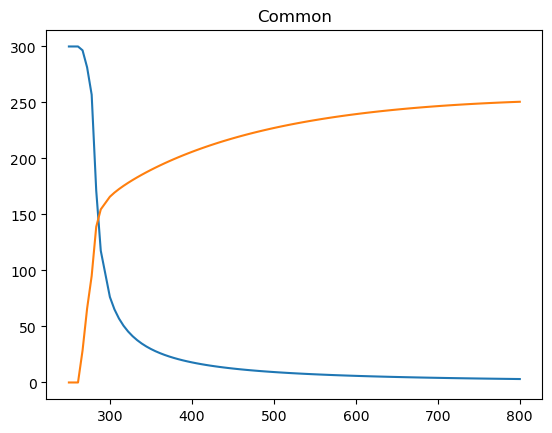

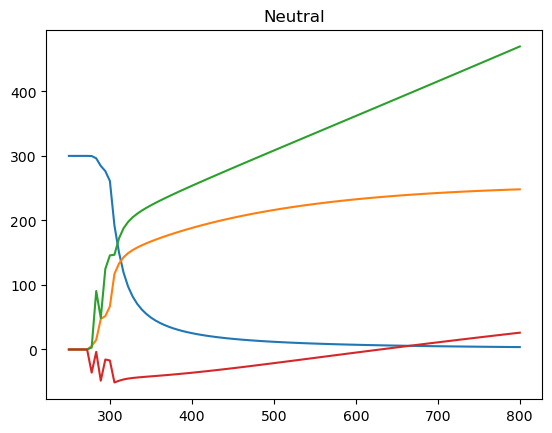

In [7]:
plt.title('Common')
plt.plot(μ_lin_common_updated_1,ϕ0_list_common)
plt.plot(μ_lin_common_updated_1,Δ0_list_common)
plt.show()

plt.title('Neutral')
plt.plot(μ_lin_neutral_updated_1, ϕ0_list_neutral)
plt.plot(μ_lin_neutral_updated_1, Δ0_list_neutral)
plt.plot(μ_lin_neutral_updated_1, μe0_list_neutral)
plt.plot(μ_lin_neutral_updated_1, μ80_list_neutral)
plt.show()

In [8]:
ϕΔμeμ8_asym = [condensate_asymptotic(μi, gΔ) for μi in μ_lin_neutral]
ϕ0_list_asym = [i[0] for i in ϕΔμeμ8_asym]
Δ0_list_asym = [i[1] for i in ϕΔμeμ8_asym]
μe0_list_asym = [i[2] for i in ϕΔμeμ8_asym]
μ80_list_asym = [i[3] for i in ϕΔμeμ8_asym]

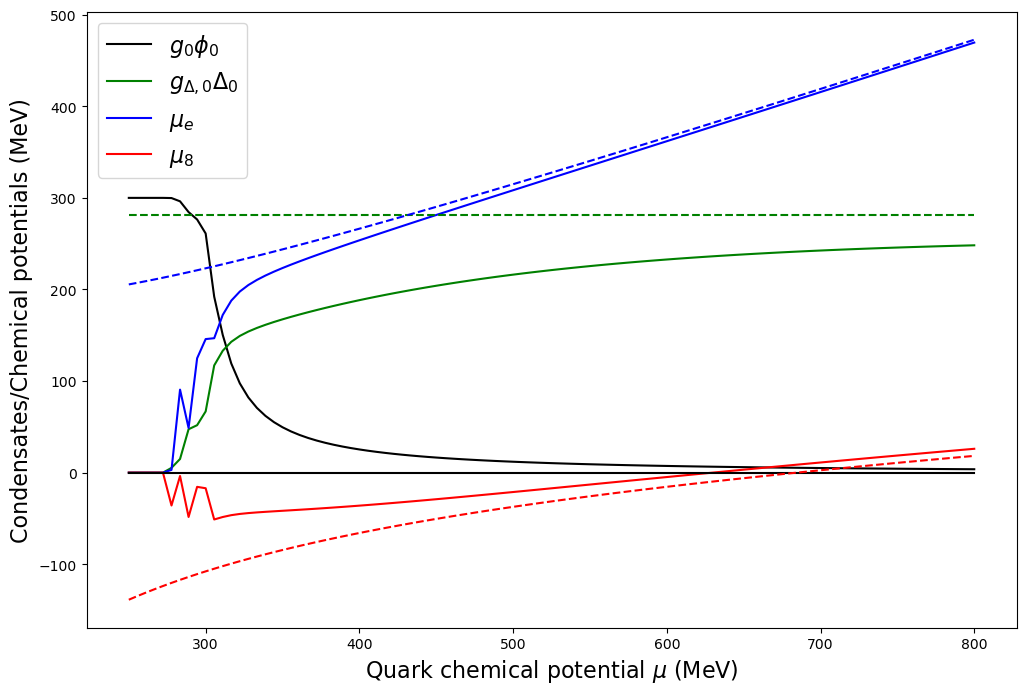

In [9]:
fig = plt.figure(figsize=(12,8))
plt.xlabel("Quark chemical potential " + r"$\mu$" +" (MeV)", fontsize=16)
plt.ylabel("Condensates/Chemical potentials (MeV)", fontsize=16)
plt.plot(μ_lin_neutral_updated_1, ϕ0_list_neutral, c= "black", label= r"$g_0\phi_0$")
plt.plot(μ_lin_neutral_updated_1, Δ0_list_neutral, c= "green", label= r"$g_{\Delta,0}\Delta_0$")
plt.plot(μ_lin_neutral_updated_1, np.array(μe0_list_neutral), c="blue", label= r"$\mu_e$")
plt.plot(μ_lin_neutral_updated_1, μ80_list_neutral, c="red", label= r"$\mu_8$")
plt.plot(μ_lin_neutral, ϕ0_list_asym, c= 'black')
plt.plot(μ_lin_neutral, Δ0_list_asym, c='green', linestyle='dashed')
plt.plot(μ_lin_neutral, μe0_list_asym, c='blue', linestyle = 'dashed')
plt.plot(μ_lin_neutral, μ80_list_asym, c='red', linestyle='dashed')
plt.legend(fontsize=16)
plt.savefig("Condensates_set1.pdf")
plt.show()

In [10]:
EoS_common = [Equation_of_state_2SC(ϕ0_list_common[i], Δ0_list_common[i], μ_lin_common_updated_1[i], 0, 0, gΔ, mΔ, λ3, λΔ, Λ_cutoff) for i in range(len(μ_lin_common_updated_1))]
EoS_neutral = [Equation_of_state_2SC(ϕ0_list_neutral[i], Δ0_list_neutral[i], μ_lin_neutral_updated_1[i], μe0_list_neutral[i], μ80_list_neutral[i], gΔ, mΔ, λ3, λΔ, Λ_cutoff) for i in range(len(μ_lin_neutral_updated_1))]

Pressure_common = [i[0] for i in EoS_common]
Energy_density_common = [i[1] for i in EoS_common]

Pressure_neutral = [i[0] for i in EoS_neutral]
Energy_density_neutral = [i[1] for i in EoS_neutral]

cs_common_1 = differentiate(Energy_density_common, Pressure_common)
cs_neutral_1 = differentiate(Energy_density_neutral, Pressure_neutral)

In [11]:
def Δ0_asymototic(gΔ):
    return np.sqrt(mq**2*np.exp((4*np.pi)**2/(4*gΔ**2) -1 - Cπ - mπ**2*dCπ))

def μe_asymptotic(μ, Δ0):
    return 3/11*(1 + (9/2)**(2/3) - (9/2)**(1/3))*μ + (2/243)**(1/3)*Δ0**2/μ

def μ8_asymptotic(μ, Δ0):
    return 9/11*(1 -(375/32)**(1/3) + (125/48)**(1/3))*μ - (125/972)**(1/3)*Δ0**2/μ

def condensate_asymptotic(μ, gΔ):
    Δ0 = Δ0_asymototic(gΔ)
    return [0, Δ0, μe_asymptotic(μ, Δ0), μ8_asymptotic(μ, Δ0)]

In [12]:
gΔ = 1.5*mq/fπ
mΔ = 900
λ3 = λ0
λΔ = λ0/4 

ϕΔμeμ8_asym_2 = [condensate_asymptotic(μi, gΔ) for μi in μ_lin_neutral]
ϕ0_list_asym_2 = [i[0] for i in ϕΔμeμ8_asym_2]
Δ0_list_asym_2 = [i[1] for i in ϕΔμeμ8_asym_2]
μe0_list_asym_2 = [i[2] for i in ϕΔμeμ8_asym_2]
μ80_list_asym_2 = [i[3] for i in ϕΔμeμ8_asym_2]

In [13]:
print(Δ0_asymototic(gΔ))

407.21142123220557


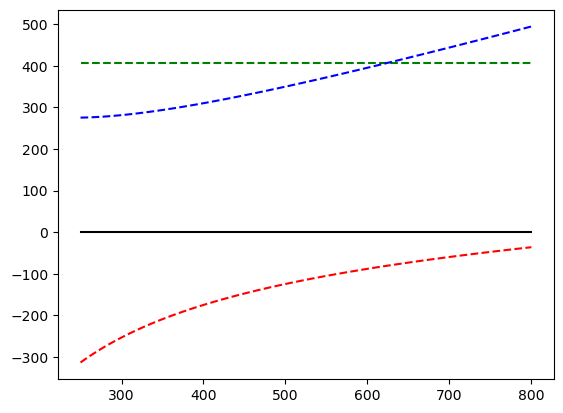

In [14]:
plt.plot(μ_lin_neutral, ϕ0_list_asym_2, c= 'black')
plt.plot(μ_lin_neutral, Δ0_list_asym_2, c='green', linestyle='dashed')
plt.plot(μ_lin_neutral, μe0_list_asym_2, c='blue', linestyle = 'dashed')
plt.plot(μ_lin_neutral, μ80_list_asym_2, c='red', linestyle='dashed')

In [15]:
μ_lin_common = np.linspace(250, 800, 100)
μ_lin_common_updated_2, min_list_common = minima_combine_common(μ_lin_common)
ϕ0_list_common = [i[0] for i in min_list_common]
Δ0_list_common = [i[1] for i in min_list_common]

μ_lin_neutral = np.linspace(250, 800, 100)
μ_lin_neutral_updated_2, min_list_neutral = minima_combine_neutral(μ_lin_neutral)
ϕ0_list_neutral = [i[0] for i in min_list_neutral]
Δ0_list_neutral = [i[1] for i in min_list_neutral]
μe0_list_neutral = [i[2] for i in min_list_neutral]
μ80_list_neutral = [i[3] for i in min_list_neutral]

  1%|          | 1/100 [00:12<20:05, 12.18s/it]

did not converge for μ =  250.0  within 100 tries: returning vacuum value


  2%|▏         | 2/100 [00:24<19:59, 12.24s/it]

did not converge for μ =  255.55555555555554  within 100 tries: returning vacuum value


  3%|▎         | 3/100 [00:37<20:07, 12.45s/it]

did not converge for μ =  261.1111111111111  within 100 tries: returning vacuum value


  4%|▍         | 4/100 [00:49<20:00, 12.50s/it]

did not converge for μ =  266.6666666666667  within 100 tries: returning vacuum value


  5%|▌         | 5/100 [01:02<20:04, 12.68s/it]

did not converge for μ =  272.22222222222223  within 100 tries: returning vacuum value


  6%|▌         | 6/100 [01:16<20:17, 12.95s/it]

did not converge for μ =  277.77777777777777  within 100 tries: returning vacuum value


  7%|▋         | 7/100 [01:29<19:59, 12.90s/it]

did not converge for μ =  283.3333333333333  within 100 tries: returning vacuum value


  8%|▊         | 8/100 [01:41<19:47, 12.91s/it]

did not converge for μ =  288.8888888888889  within 100 tries: returning vacuum value


  9%|▉         | 9/100 [01:57<21:02, 13.88s/it]

did not converge for μ =  294.44444444444446  within 100 tries: returning vacuum value


 74%|███████▍  | 74/100 [02:29<00:35,  1.37s/it]C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:480: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, err = integrate.quad(integrand, 0, Λ_cutoff)
 89%|████████▉ | 89/100 [02:39<00:05,  2.08it/s]C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:480: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, err = integrate.quad(integrand, 0, Λ_cutoff)
100%|██████████| 100/100 [02:57<00:00,  1.77s/it]
C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:120: IntegrationWarning: The maximum number o

did not converge for μ =  294.44444444444446  within 100 tries


  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:280: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_finite, err_finite = integrate.quad(integrand_finite, 0, Λ_cutoff)
C:\Users\mathi\PhD\Paper2\GeneralFunctions_2SC.py:280: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_finite, err_finite = integrate.quad(integrand_finite, 0, Λ_cutoff)
  4%|▍         | 4/100 [00:10<04:22,  2.74s/it]C:\Users\mathi\PhD\Paper2

[[300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [300, 0, 0, 0], [289.66040177877545, 6.591843913247846, 35.0219009186406, 2.323230171114208], [279.0146368075915, 12.692878240373986, 54.717594323118554, 2.1217035917195477], [258.7021425333005, 21.9600350286199, 82.76344059645808, 1.475541300913732], [214.8181221363088, 36.60601914708901, 125.75316764500116, 0.8682831809202796], [151.98136740074688, 51.671307744822144, 167.8150304728049, 0.9075019404843162], [113.26200670429367, 59.89775340263049, 187.51863188062984, 0.543532692106419], [90.47394834519862, 65.34844569515657, 198.2792839076103, -0.19742649254501346], [75.38178758264672, 69.78288058675844, 205.75100225449467, -1.1055906078487705], [64.57364386793283, 73.75816502636069, 211.72578213104646, -2.090010367918076], [56.420172344197475, 77.49373282516915, 216.9128568120711, -3.10841357261717], [50.03708

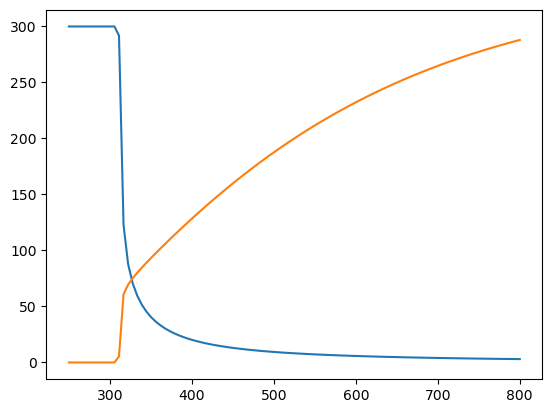

In [16]:
plt.plot(μ_lin_common_updated_2, ϕ0_list_common)
plt.plot(μ_lin_common_updated_2, Δ0_list_common)

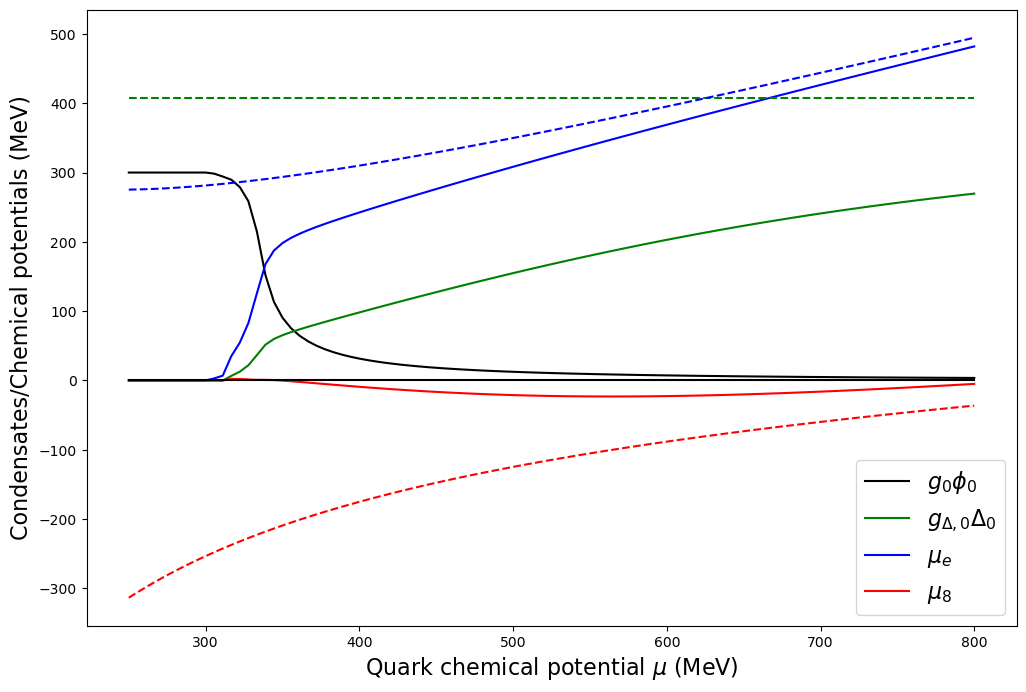

In [17]:
fig = plt.figure(figsize=(12,8))
plt.xlabel("Quark chemical potential " + r"$\mu$" +" (MeV)", fontsize=16)
plt.ylabel("Condensates/Chemical potentials (MeV)", fontsize=16)
plt.plot(μ_lin_neutral_updated_2, ϕ0_list_neutral, c= "black", label= r"$g_0\phi_0$")
plt.plot(μ_lin_neutral_updated_2, Δ0_list_neutral, c= "green", label= r"$g_{\Delta,0}\Delta_0$")
plt.plot(μ_lin_neutral_updated_2, np.array(μe0_list_neutral), c="blue", label= r"$\mu_e$")
plt.plot(μ_lin_neutral_updated_2, μ80_list_neutral, c="red", label= r"$\mu_8$")
plt.plot(μ_lin_neutral, ϕ0_list_asym_2, c= 'black')
plt.plot(μ_lin_neutral, Δ0_list_asym_2, c='green', linestyle='dashed')
plt.plot(μ_lin_neutral, μe0_list_asym_2, c='blue', linestyle = 'dashed')
plt.plot(μ_lin_neutral, μ80_list_asym_2, c='red', linestyle='dashed')
plt.legend(fontsize=16)
plt.savefig("Condensates_set2.pdf")
plt.show()

In [18]:
EoS_common = [Equation_of_state_2SC(ϕ0_list_common[i], Δ0_list_common[i], μ_lin_common_updated_2[i], 0, 0, gΔ, mΔ, λ3, λΔ, Λ_cutoff) for i in range(len(μ_lin_common_updated_2))]
EoS_neutral = [Equation_of_state_2SC(ϕ0_list_neutral[i], Δ0_list_neutral[i], μ_lin_neutral_updated_2[i], μe0_list_neutral[i], μ80_list_neutral[i], gΔ, mΔ, λ3, λΔ, Λ_cutoff) for i in range(len(μ_lin_neutral_updated_2))]

Pressure_common = [i[0] for i in EoS_common]
Energy_density_common = [i[1] for i in EoS_common]

Pressure_neutral = [i[0] for i in EoS_neutral]
Energy_density_neutral = [i[1] for i in EoS_neutral]

cs_common_2 = differentiate(Energy_density_common, Pressure_common)
cs_neutral_2 = differentiate(Energy_density_neutral, Pressure_neutral)

cs_common_2_v2 = np.diff(np.array(Pressure_common))/np.diff(np.array(Energy_density_common))
cs_neutral_2_v2 = np.diff(np.array(Pressure_neutral))/np.diff(np.array((Energy_density_neutral)))


C:\Users\mathi\AppData\Local\Temp\ipykernel_2692\3472177730.py:15: RuntimeWarning: invalid value encountered in scalar divide
  diff = [1/2*((y_dat[i+1] - y_dat[i])/(x_dat[i+1] - x_dat[i]) + (y_dat[i] - y_dat[i-1])/(x_dat[i] - x_dat[i-1]))  for i in range(1,len(y_dat)-1)]
C:\Users\mathi\AppData\Local\Temp\ipykernel_2692\2603602399.py:14: RuntimeWarning: invalid value encountered in divide
  cs_neutral_2_v2 = np.diff(np.array(Pressure_neutral))/np.diff(np.array((Energy_density_neutral)))


(0.0, 100.0)

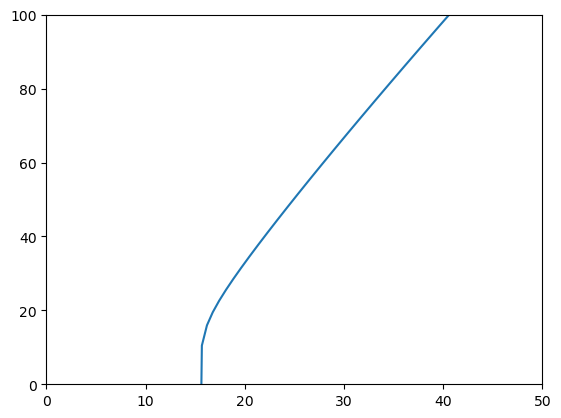

In [19]:
plt.plot(Pressure_common, Energy_density_common)
plt.xlim(0, 50)
plt.ylim(0,100)

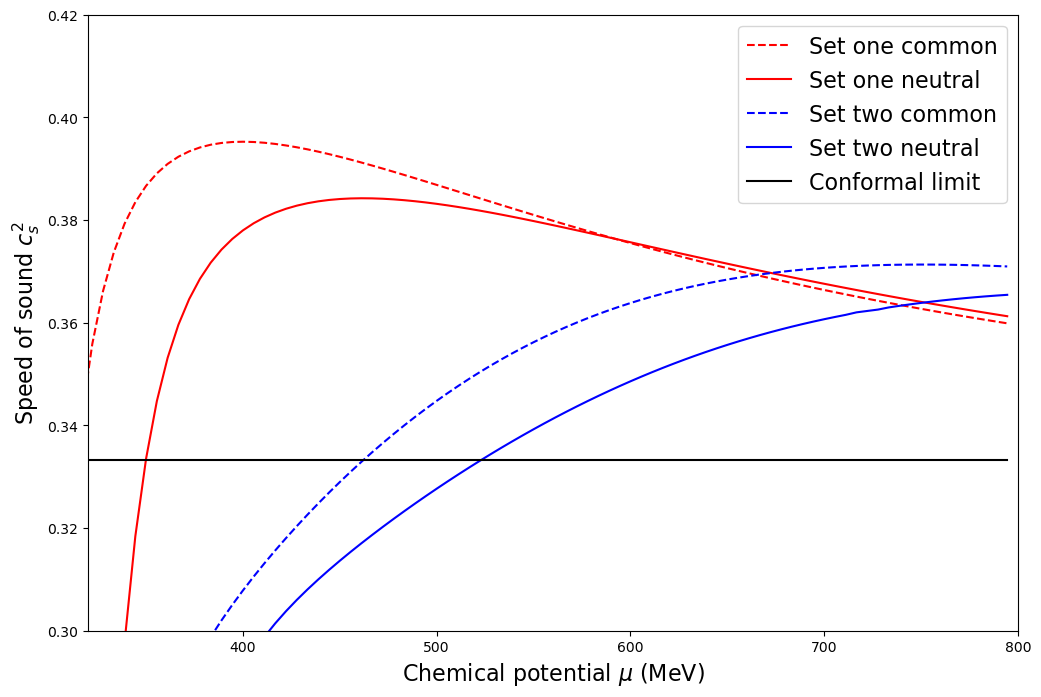

In [20]:
fig = plt.figure(figsize=(12,8))
plt.plot(μ_lin_common_updated_1[1:-1], cs_common_1, label = 'Set one common', c='red',linestyle='dashed')
plt.plot(μ_lin_neutral_updated_1[1:-1], cs_neutral_1, label = 'Set one neutral',c='red')
plt.plot(μ_lin_common_updated_2[1:-1], cs_common_2, label = 'Set two common',c='blue',linestyle='dashed')
plt.plot(μ_lin_neutral_updated_2[1:-1], cs_neutral_2, label = 'Set two neutral', c='blue')
plt.plot(μ_lin_neutral_updated_2[1:-1], [1/3]*(len(μ_lin_neutral_updated_2)-2), label = 'Conformal limit',c='black')
#plt.plot(μ_lin_neutral, cs_asymptotic(μ_lin_neutral), c= 'purple')
plt.ylim(0.3, 0.42)
plt.xlim(320, 800)
plt.xlabel('Chemical potential ' + r'$\mu$' + ' (MeV)', fontsize=16)
plt.ylabel('Speed of sound ' + r'$c_s^2$', fontsize =16)
plt.legend(fontsize=16)
plt.savefig('SpeedOfSound_mu_quark.pdf')
plt.show()

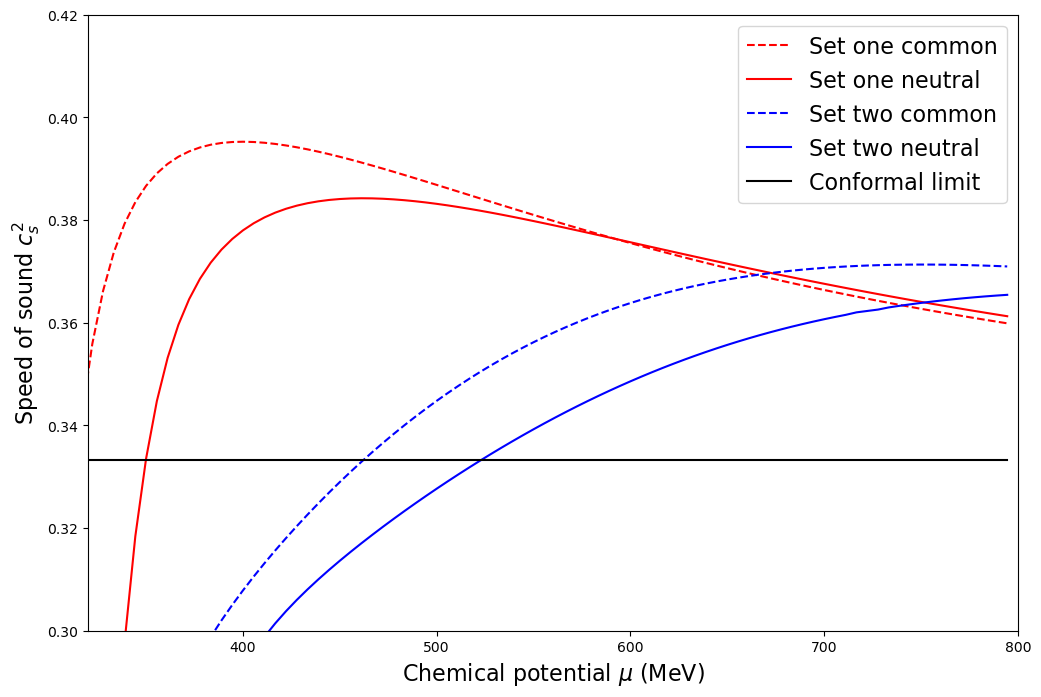

In [21]:
fig = plt.figure(figsize=(12,8))
plt.plot(μ_lin_common_updated_1[1:-1], cs_common_1, label = 'Set one common', c='red',linestyle='dashed')
plt.plot(μ_lin_neutral_updated_1[1:-1], cs_neutral_1, label = 'Set one neutral',c='red')
plt.plot(μ_lin_common_updated_2[1:-1], cs_common_2, label = 'Set two common',c='blue',linestyle='dashed')
plt.plot(μ_lin_neutral_updated_2[21:-1], cs_neutral_2[20:], label = 'Set two neutral', c='blue')
plt.plot(μ_lin_neutral_updated_2[1:-1], [1/3]*(len(μ_lin_neutral_updated_2)-2), label = 'Conformal limit',c='black')
#plt.plot(μ_lin_neutral, cs_asymptotic(μ_lin_neutral), c= 'purple')
plt.ylim(0.3, 0.42)
plt.xlim(320, 800)
plt.xlabel('Chemical potential ' + r'$\mu$' + ' (MeV)', fontsize=16)
plt.ylabel('Speed of sound ' + r'$c_s^2$', fontsize =16)
plt.legend(fontsize=16)
plt.savefig('SpeedOfSound_mu_quark.pdf')
plt.show()